#Classifier - Cardiac Disease

João Vitor de Paiva Marcotti

Electrical Engineer - State University of Maringá - UEM (Brazil)

8th Semester Economics Student - Cesumar University - UniCesumar (Brazil)

Open to Work

Contact: joaovmarcotti@hotmail.com



#Data Preparation

In [ ]:
# Imports the libraries
import pandas as pd
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

In [ ]:
# Imports the cardio data
df = pd.read_csv('cardio_data_processed.csv')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438,Hypertension Stage 1,Hypertension Stage 1
68201,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61,50.472681,Hypertension Stage 2,Hypertension Stage 2
68202,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579,Hypertension Stage 2,Hypertension Stage 2
68203,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,Hypertension Stage 1,Hypertension Stage 1


In [ ]:
# Renames the columns titles
df.columns = df.columns.str.capitalize()

In [ ]:
# Replaces the male gender from 2 to 0
df['Gender'] = df['Gender'].replace(2, 0)

In [ ]:
# Drops the 'Bp_category_encoded', 'Id' and 'Age' columns
df = df.drop(['Bp_category_encoded', 'Id', 'Age'], axis=1)

In [ ]:
# Encodes the BP Category into 1, 2, 3 and 4
lb = LabelEncoder()
df['Bp_category_encoded'] = lb.fit_transform(df['Bp_category'].astype(str))

In [ ]:
# Checks if there is any NaN in the df
df.isna().sum()

Gender                 0
Height                 0
Weight                 0
Ap_hi                  0
Ap_lo                  0
Cholesterol            0
Gluc                   0
Smoke                  0
Alco                   0
Active                 0
Cardio                 0
Age_years              0
Bmi                    0
Bp_category            0
Bp_category_encoded    0
dtype: int64

In [ ]:
# Sets the Y dataframes
df_y_BP = df['Bp_category_encoded']
df_y_CD = df['Cardio']

In [ ]:
# Sets the X2 dataframe, that will be used during the diagnosis section
df_x2 = df.drop(['Bp_category_encoded','Bp_category', 'Cardio', 'Age_years'],axis=1)

In [ ]:
# Sets the X dataframe
scaler = MinMaxScaler()
df_x=scaler.fit_transform(df_x2)

In [ ]:
# Splits BP data into train and test
x_train_BP, x_test_BP, y_train_BP, y_test_BP = train_test_split(df_x, df_y_BP, test_size=0.2,random_state=42)

# Displays the BP train and test data shape
x_train_BP.shape, x_test_BP.shape, y_train_BP.shape, y_test_BP.shape

((54564, 11), (13641, 11), (54564,), (13641,))

In [ ]:
# Splits CD data into train and test
x_train_CD, x_test_CD, y_train_CD, y_test_CD = train_test_split(df_x, df_y_CD, test_size=0.2,random_state=42)

# Displays the CD train and test data shape
x_train_CD.shape, x_test_CD.shape, y_train_CD.shape, y_test_CD.shape

((54564, 11), (13641, 11), (54564,), (13641,))

In [ ]:
# Defines accuracy, mse and time lists, to be used to compare the models performance
accuracy_list_BP = []
accuracy_list_CD = []
model_list = []
time_list = []

#Exploratory Data Analysis

[Text(0, 0.5, 'Number of Patients'),
 Text(0.5, 0, 'Age in Years'),
 Text(0.5, 1.0, 'Distribution of Patients by Age')]

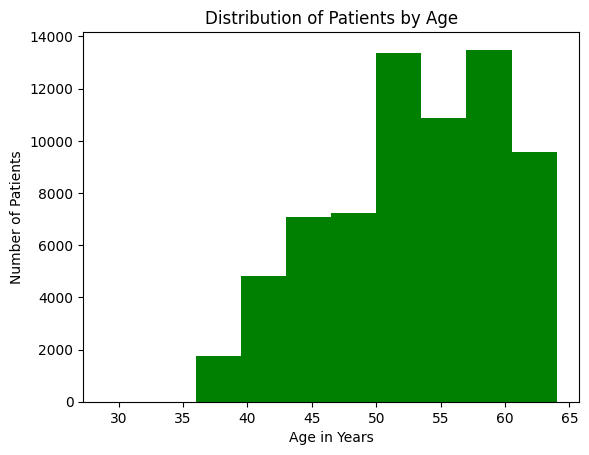

In [ ]:
# Displays the distribuition of patients by age
fig, ax = plt.subplots()
ax.hist(df['Age_years'], color='g')
ax.set(ylabel='Number of Patients',
       xlabel='Age in Years',
       title='Distribution of Patients by Age')

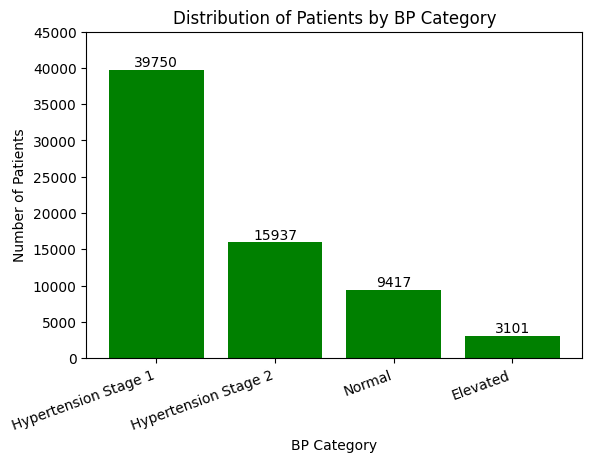

In [ ]:
# Displays the distribuition of patients by by BP category
fig, ax = plt.subplots()
bars = ax.bar(df['Bp_category'].unique(),df['Bp_category'].value_counts(), color='g')
ax.set(ylabel='Number of Patients',
       xlabel='BP Category',
       title='Distribution of Patients by BP Category',
       ylim=(0,45000))
ax.bar_label(bars)
fig.autofmt_xdate(rotation=20)

[Text(0, 0, '34533'), Text(0, 0, '33672')]

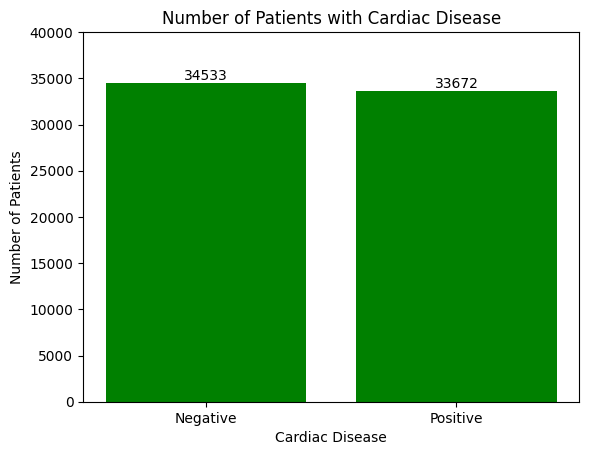

In [ ]:
# Displays the number of patients with and without cardiac disease
fig, ax = plt.subplots()
bars = ax.bar(['Negative','Positive'],df['Cardio'].value_counts(), color='g')
ax.set(ylabel='Number of Patients',
       xlabel='Cardiac Disease',
       title='Number of Patients with Cardiac Disease',
       ylim=(0,40000),
       xticks=range(0,2))
ax.bar_label(bars)

[Text(0, 0, '44427'), Text(0, 0, '23778')]

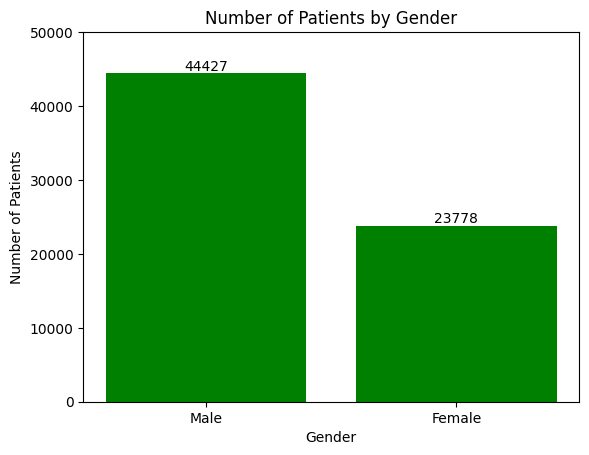

In [ ]:
# Displays the number of patients by gender
fig, ax = plt.subplots()
bars = ax.bar(['Male','Female'],df['Gender'].value_counts(), color='g')
ax.set(ylabel='Number of Patients',
       xlabel='Gender',
       title='Number of Patients by Gender',
       ylim=(0,50000),
       xticks=range(0,2))
ax.bar_label(bars)

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Creates the Logistic Regression models

start_time = time.time()

LR_model = LogisticRegression(random_state=42, max_iter=10000)

##########################################################################

LR_model.fit(x_train_BP, y_train_BP)
y_pred_BP = LR_model.predict(x_test_BP)

print("")
accuracy_BP = accuracy_score(y_test_BP, y_pred_BP)
print("BP Accuracy:", round(accuracy_BP,4))

##########################################################################

LR_model.fit(x_train_CD, y_train_CD)
y_pred_CD = LR_model.predict(x_test_CD)

print("")
accuracy_CD = accuracy_score(y_test_CD, y_pred_CD)
print("CD Accuracy:", round(accuracy_CD,4))

##########################################################################

end_time = time.time()
execution_time = end_time - start_time

accuracy_list_BP.append(round(accuracy_BP,4))
accuracy_list_CD.append(round(accuracy_CD,4))
model_list.append('LR')
time_list.append(execution_time)

print("")
print("Execution Time:", round(execution_time, 4),"s")


BP Accuracy: 0.9311

CD Accuracy: 0.7222

Execution Time: 4.7376 s


#Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Creates the Baussian Naive Bayes models

start_time = time.time()

GNB_model = GaussianNB()

##########################################################################

GNB_model.fit(x_train_BP, y_train_BP)
y_pred_BP = GNB_model.predict(x_test_BP)

print("")
accuracy_BP = accuracy_score(y_test_BP, y_pred_BP)
print("BP Accuracy:", round(accuracy_BP,4))

##########################################################################

GNB_model.fit(x_train_CD, y_train_CD)
y_pred_CD = GNB_model.predict(x_test_CD)

print("")
accuracy_CD = accuracy_score(y_test_CD, y_pred_CD)
print("CD Accuracy:", round(accuracy_CD,4))

##########################################################################

end_time = time.time()
execution_time = end_time - start_time

accuracy_list_BP.append(round(accuracy_BP,4))
accuracy_list_CD.append(round(accuracy_CD,4))
model_list.append('GNB')
time_list.append(execution_time)

print("")
print("Execution Time:", round(execution_time, 4),"s")


BP Accuracy: 0.9133

CD Accuracy: 0.7035

Execution Time: 0.075 s


#SVM

In [ ]:
from sklearn.svm import SVC

# Creates the SVC models

start_time = time.time()

SVC_model = SVC(random_state=42)

##########################################################################

SVC_model.fit(x_train_BP, y_train_BP)
y_pred_BP = SVC_model.predict(x_test_BP)

print("")
accuracy_BP = accuracy_score(y_test_BP, y_pred_BP)
print("BP Accuracy:", round(accuracy_BP,4))

##########################################################################

SVC_model.fit(x_train_CD, y_train_CD)
y_pred_CD = SVC_model.predict(x_test_CD)

print("")
accuracy_CD = accuracy_score(y_test_CD, y_pred_CD)
print("CD Accuracy:", round(accuracy_CD,4))

##########################################################################

end_time = time.time()
execution_time = end_time - start_time

accuracy_list_BP.append(round(accuracy_BP,4))
accuracy_list_CD.append(round(accuracy_CD,4))
model_list.append('SVC')
time_list.append(execution_time)

print("")
print("Execution Time:", round(execution_time, 4),"s")


BP Accuracy: 0.9188

CD Accuracy: 0.7226

Execution Time: 226.1545 s


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Creates the Random Forest models

start_time = time.time()

RF_model = RandomForestClassifier(max_depth=150, max_leaf_nodes=150, n_estimators = 40, random_state=42)

##########################################################################

RF_model.fit(x_train_BP, y_train_BP)
y_pred_BP = RF_model.predict(x_test_BP)

print("")
accuracy_BP = accuracy_score(y_test_BP, y_pred_BP)
print("BP Accuracy:", round(accuracy_BP,4))

##########################################################################

RF_model.fit(x_train_CD, y_train_CD)
y_pred_CD = RF_model.predict(x_test_CD)

print("")
accuracy_CD = accuracy_score(y_test_CD, y_pred_CD)
print("CD Accuracy:", round(accuracy_CD,4))

##########################################################################

end_time = time.time()
execution_time = end_time - start_time

accuracy_list_BP.append(round(accuracy_BP,4))
accuracy_list_CD.append(round(accuracy_CD,4))
model_list.append('RF')
time_list.append(execution_time)

print("")
print("Execution Time:", round(execution_time, 4),"s")


BP Accuracy: 0.9994

CD Accuracy: 0.723

Execution Time: 2.3157 s


#MLP

In [ ]:
# Creates the MLP models

adam = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
tf.random.set_seed(42)

start_time = time.time()

MLP_model_BP = Sequential([
    Dense(x_train_BP.shape[1], activation='relu', input_dim=x_train_BP.shape[1]),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')])

MLP_model_BP.compile(optimizer=adam,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

##########################################################################

history_BP = MLP_model_BP.fit(x_train_BP,y_train_BP, epochs=10, validation_data=[x_test_BP,y_test_BP])

print("")
loss_BP, accuracy_BP = MLP_model_BP.evaluate(x_test_BP, y_test_BP)
print("BP Accuracy:", round(accuracy_BP,4))
print("")
print("BP Loss:", round(loss_BP,4))

##########################################################################

MLP_model_CD = Sequential([
    Dense(x_train_CD.shape[1], activation='relu', input_dim=x_train_CD.shape[1]),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')])

MLP_model_CD.compile(optimizer=adam,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

history_CD = MLP_model_CD.fit(x_train_CD,y_train_CD, epochs=20, validation_data=[x_test_CD,y_test_CD])

print("")
loss_CD, accuracy_CD = MLP_model_CD.evaluate(x_test_CD, y_test_CD)
print("CD Accuracy:", round(accuracy_CD,4))
print("")
print("CD Loss:", round(loss_CD,4))

##########################################################################

end_time = time.time()
execution_time = end_time - start_time

accuracy_list_BP.append(round(accuracy_BP,4))
accuracy_list_CD.append(round(accuracy_CD,4))
model_list.append('MLP')
time_list.append(execution_time)

print("")
print("Execution Time:", round(execution_time, 4),"s")

Epoch 1/10
1706/1706 [==============================] - 4s 2ms/step - loss: 0.7518 - accuracy: 0.7024 - val_loss: 0.3304 - val_accuracy: 0.8771
Epoch 2/10
1706/1706 [==============================] - 4s 2ms/step - loss: 0.3565 - accuracy: 0.8662 - val_loss: 0.2783 - val_accuracy: 0.9044
Epoch 3/10
1706/1706 [==============================] - 4s 2ms/step - loss: 0.3120 - accuracy: 0.8865 - val_loss: 0.2895 - val_accuracy: 0.9077
Epoch 4/10
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2876 - accuracy: 0.8983 - val_loss: 0.2689 - val_accuracy: 0.9236
Epoch 5/10
1706/1706 [==============================] - 4s 3ms/step - loss: 0.2717 - accuracy: 0.9019 - val_loss: 0.2509 - val_accuracy: 0.9288
Epoch 6/10
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2551 - accuracy: 0.9049 - val_loss: 0.2072 - val_accuracy: 0.9496
Epoch 7/10
1706/1706 [==============================] - 4s 2ms/step - loss: 0.2303 - accuracy: 0.9110 - val_loss: 0.1826 - val_accuracy:

# Ratings

In [ ]:
# Displays the models ratings
ratings = pd.DataFrame({'Model':model_list, 'BP Accuracy':accuracy_list_BP, 'CD Accuracy':accuracy_list_CD, 'Time':time_list})
ratings

,Model,BP Accuracy,CD Accuracy,Time
0,LR,0.9311,0.7222,4.737612
1,GNB,0.9133,0.7035,0.075027
2,SVC,0.9188,0.7226,226.154464
3,RF,0.9994,0.7230,2.315670
4,MLP,0.9456,0.7239,122.183427


#Diagnosis

In [ ]:
# Get informations about the user
name = input('Name: ')
gender = input('Gender (M=1, H=0): ')
height = input('Height (cm): ')
weight = input('Weight (kg): ')
SBP = input('Systolic blood pressure: ')
DBP = input('Diastolic blood pressure: ')
cholesterol = input('Cholesterol level (1: Normal, 2: Above Normal, 3: Well Above Normal): ')
glucose = input('Glucose level (1: Normal, 2: Above Normal, 3: Well Above Normal): ')
smoking = input('Smoking status (0=No, 1=Yes): ')
alcohol = input('Alcohol status (0=No, 1=Yes): ')
active = input('Physically active (0=No, 1=Yes): ')
print('')

# Calculates the user BMI
bmi = round(int(weight)/(int(height)/100*int(height)/100),6)

# Creates the user input values array
input_values = [[gender, height, weight, SBP, DBP, cholesterol, glucose, smoking, alcohol, active, bmi]]

# Adds the input values to the df_x2 last row
df_x2.loc[len(df_x2)] = input_values[0]

# Scales the df_x2
scaler = MinMaxScaler()
df_x3 = scaler.fit_transform(df_x2)

values_to_predict = df_x3[-1].reshape(1,-1)

# Predicts the user BP and CD status
BP_pred = MLP_model_BP.predict(values_to_predict)
CD_pred = MLP_model_CD.predict(values_to_predict)

# Displays the results
print('')
print(f'Patient: {name}')
BP = lb.inverse_transform(np.argmax(BP_pred, axis=1))[0]
print(f'Blood Preasure Classification: {BP}')
CD = np.where((CD_pred > 0.5).astype(int) == 1, 'Positive', 'Negative')[0][0]
print(f'Cardiac Disease Classification: {CD}')

Name: Patient 1
Gender (M=1, H=0): 0
Height (cm): 169
Weight (kg): 200
Systolic blood pressure: 150
Diastolic blood pressure: 120
Cholesterol level (1: Normal, 2: Above Normal, 3: Well Above Normal): 2
Glucose level (1: Normal, 2: Above Normal, 3: Well Above Normal): 2
Smoking status (0=No, 1=Yes): 1
Alcohol status (0=No, 1=Yes): 0
Physically active (0=No, 1=Yes): 0

1/1 [==============================] - 0s 56ms/step

Patient: Patient 1
Blood Preasure Classification: Hypertension Stage 2
Cardiac Disease Classification: Positive
